## **Customer Segmentation For A Fashion Outlet Using K-Clustering**
*### This dataset has supervised data but for the purpose of this project, we will extract columns (age and purchase amount) to study clustering.*

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/p&p_shopping_trends - shopping_trends_updated.csv")

In [10]:
# running some exploratory analysis on the dataset
df.info() # no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.shape

(3900, 18)

In [34]:
# extract demographic data - based on age and purchase amount
df_x = df.iloc[:, [1, 5]].values
df_x

array([[55, 53],
       [19, 64],
       [50, 73],
       ...,
       [46, 33],
       [44, 77],
       [52, 81]])

In [ ]:
# K-Mean Clustering = unsupervised learning algorithm that groups the unlabelled data into clusters
# K = predefined clusters that need to be created in the process
# Elbow Plot = used to determine optimal number of clusters for unsupervised data
from sklearn.cluster import KMeans
# within cluster sum of square, distance between each point and centroid
# decreases with num of clusters, is largest when k = 1
wcss_list = []

for i in range(1, 11): # assume max clusters <= 10
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
  kmeans.fit(df_x)
  wcss_list.append(kmeans.inertia_)

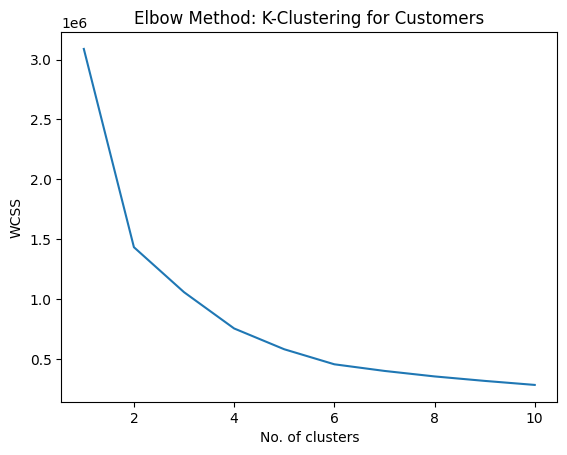

In [29]:
plt.plot(range(1,11), wcss_list)
plt.title("Elbow Method: K-Clustering for Customers")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

### From the graph, we can observe the optimal value of k is **4**.

In [36]:
model = KMeans(n_clusters = 4, init="k-means++", random_state=0)

In [ ]:
y_kmeans = model.fit_predict(df_x)

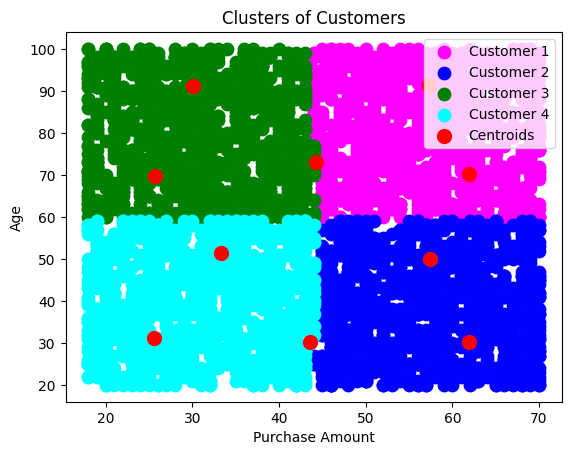

In [37]:
# matrix of output cluster - for all three clusters
plt.scatter(df_x[y_kmeans == 0, 0], df_x[y_kmeans == 0, 1], s=80, c="magenta", label="Customer 1")
plt.scatter(df_x[y_kmeans == 1, 0], df_x[y_kmeans == 1, 1], s=80, c="blue", label="Customer 2")
plt.scatter(df_x[y_kmeans == 2, 0], df_x[y_kmeans == 2, 1], s=80, c="green", label="Customer 3")
plt.scatter(df_x[y_kmeans == 3, 0], df_x[y_kmeans == 3, 1], s=80, c="cyan", label="Customer 4")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Age")
plt.legend()
plt.show()

Based on the above results, we can see 4 clear clusters based on age / purchase amount. This can help us identify the customer segments based on age and purchase.